# Simulation Problem 8
## Machine Learning HW3

#### Loading Dataset

In [6]:
from load_pics import loadData
X, Y = loadData()
print(X.shape, Y.shape)

from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(X, Y, test_size=0.2, random_state=1)

(122, 2) (122,)


#### Fitting GMM with Different K

In [19]:
from sklearn.mixture import GaussianMixture
def train(k):
    global x_train, y_train
    model = GaussianMixture(n_components=k, random_state=1).fit(x_train, y_train)
    print("GMM K = ", k)
    print("Means:", model.means_)
    print("Sigmas:", model.covariances_)
    return model.aic(x_train), model.bic(x_train), model.means_, model.covariances_

In [20]:
AIC = list("")
BIC = list("")

for i in range(2, 10):
    aic, bic, mu, cov = train(i)
    AIC.append(aic)
    BIC.append(bic)

GMM K =  2
Means: [[ 64.35630801  80.28786961]
 [100.29725557 107.1734897 ]]
Sigmas: [[[ 360.2729136   170.22852089]
  [ 170.22852089  596.35424568]]

 [[1062.16753214  317.62509916]
  [ 317.62509916  866.3491103 ]]]
GMM K =  3
Means: [[ 85.17433988  77.48386397]
 [155.81721273 117.9528609 ]
 [ 66.8729189  105.30812375]]
Sigmas: [[[ 777.30232881  524.48666194]
  [ 524.48666194  441.74885816]]

 [[ 596.92229686 1005.57396886]
  [1005.57396886 1795.01281705]]

 [[ 429.06360106  399.77600718]
  [ 399.77600718  804.68342457]]]
GMM K =  4
Means: [[ 61.79573654  61.54314162]
 [ 83.58212855  96.58080375]
 [ 68.34545039 112.40293031]
 [126.71115507 106.37239553]]
Sigmas: [[[ 297.57082521  123.02402255]
  [ 123.02402255  124.34965061]]

 [[ 294.38819412 -228.02432181]
  [-228.02432181  201.60136954]]

 [[ 529.37222106  507.87009004]
  [ 507.87009004  819.24279198]]

 [[ 765.63219196  619.08776108]
  [ 619.08776108  698.06163197]]]
GMM K =  5
Means: [[ 66.70453334 107.98408703]
 [ 95.79775228  8

#### AIC/BIC

Text(0.5, 1.0, 'Bayesian Information Criterion')

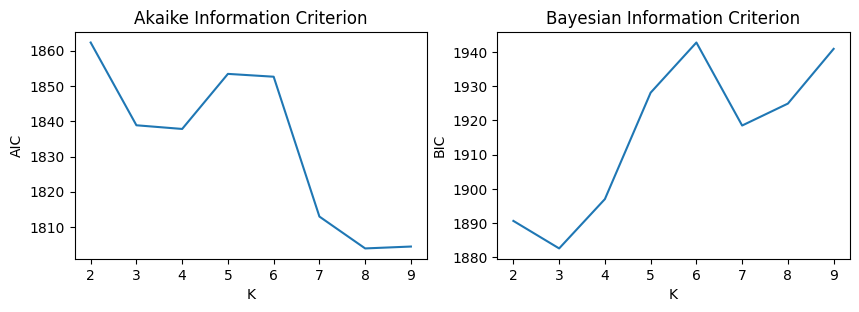

In [26]:
import matplotlib.pyplot as plt
import numpy as np

manu = list("")
chf = list("")

for i in range(x_train.shape[0]):
    if y_train[i] == 0:
        manu.append(x_train[i])
    else:
        chf.append(x_train[i])
manu = np.array(manu)
chf = np.array(chf)

fig, ax = plt.subplots(1,2)
fig.set_dpi(100)
fig.set_size_inches(10, 3)

ax[0].plot(range(2,10),AIC)
ax[0].set_xlabel("K")
ax[0].set_title("Akaike Information Criterion")
ax[0].set_ylabel("AIC")

ax[1].plot(range(2,10),BIC)
ax[1].set_xlabel("K")
ax[1].set_ylabel("BIC")
ax[1].set_title("Bayesian Information Criterion")

#### Best GMM Model

Most Efficient k:  3
GMM K =  3
Means: [[ 85.17433988  77.48386397]
 [155.81721273 117.9528609 ]
 [ 66.8729189  105.30812375]]
Sigmas: [[[ 777.30232881  524.48666194]
  [ 524.48666194  441.74885816]]

 [[ 596.92229686 1005.57396886]
  [1005.57396886 1795.01281705]]

 [[ 429.06360106  399.77600718]
  [ 399.77600718  804.68342457]]]


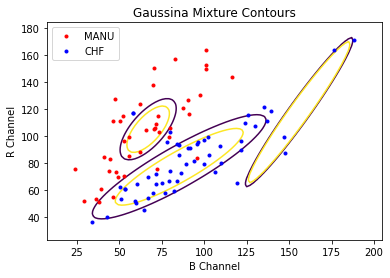

In [25]:
from scipy.stats import multivariate_normal

k = np.argmin(np.array(BIC)) + 2
print("Most Efficient k: ", k)
_, _, mu, cov = train(k)

deltaX = (max(x_train[:,0]) - min(x_train[:,0]))/10
deltaY = (max(x_train[:,1]) - min(x_train[:,1]))/10
xmin = min(x_train[:,0]) - deltaX
xmax = max(x_train[:,0]) + deltaX
ymin = min(x_train[:,1]) - deltaY
ymax = max(x_train[:,1]) + deltaY
xx, yy = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]

for i in range(mu.shape[0]):
    target = multivariate_normal(mean=mu[i], cov=cov[i])
    xy = target.rvs()
    xy2 = target.rvs() 
    zz = target.pdf(np.dstack((xx, yy)))
    plt.contour(xx,yy, zz, levels=np.sort([target.pdf(xy), target.pdf(xy2)]))

plt.plot(manu[:,0], manu[:,1], '.r', label='MANU')
plt.plot(chf[:,0], chf[:,1], '.b', label='CHF')
plt.xlabel("B Channel")
plt.ylabel("R Channel")
plt.legend()
plt.title("Gaussina Mixture Contours")
plt.show()